# Machine learning introduction Notebook

1. **IRIS data analysis**
  Correlation Analysis  
  PCA analysis  
2. Pandas as dataframe work
3. Matplotlib & Seaborn as plotting library  
  Confusion Matrix  
  Dimension Reduction  
4. **Scikit-learn as ML tools**   
  Decision Tree  
  * Decision Tree nodes visualization using graphviz 
  
  Logistic Regression  
  Linear SVM  
  KNN classifier  
  * Relation of number of nearest neighbor  
  
  MLP classifier  

@by takchoi.yu@augentix.com 2018/12/7



## Reference

Confusion Matrix  
https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html    

PCA Analysis   
https://jakevdp.github.io/PythonDataScienceHandbook/05.09-principal-component-analysis.html   

One hot encoding   
https://machinelearningmastery.com/how-to-one-hot-encode-sequence-data-in-python/  
 
IRIS data plt sns plot
SVM  
Logistic Regress  
Decision Tree  
KNN Classifer  
https://www.kaggle.com/ash316/ml-from-scratch-with-iris   

Decision Tree Visualization  
https://scikit-learn.org/stable/modules/tree.html  

MLP  Classifier  
https://scikit-learn.org/stable/modules/neural_networks_supervised.html  
https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html  

MNIST  
https://medium.com/@luckylwk/visualising-high-dimensional-datasets-using-pca-and-t-sne-in-python-8ef87e7915b  

In [0]:
from sklearn.datasets import load_iris

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA

In [0]:
from matplotlib.colors import ListedColormap

def plot_decision_regions(X,y,classifier,test_idx=None,resolution=0.02):
    
    # Initialise the marker types and colors
    markers = ('s','x','o','^','v')
    colors = ('red','blue','lightgreen','gray','cyan')
    color_Map = ListedColormap(colors[:len(np.unique(y))]) #we take the color mapping correspoding to the 
                                                            #amount of classes in the target data
    
    # Parameters for the graph and decision surface
    x1_min = X[:,0].min() - 1
    x1_max = X[:,0].max() + 1
    x2_min = X[:,1].min() - 1
    x2_max = X[:,1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min,x1_max,resolution),
                           np.arange(x2_min,x2_max,resolution))
    
    Z = classifier.predict(np.array([xx1.ravel(),xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    
    plt.contour(xx1,xx2,Z,alpha=0.4,cmap = color_Map)
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())
    
    # Plot samples
    X_test, Y_test = X[test_idx,:], y[test_idx]
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x = X[y == cl, 0], y = X[y == cl, 1],
                    alpha = 0.8, c = color_Map(idx),
                    marker = markers[idx], label = cl
                   )

In [0]:
!pip install -q pydot graphviz

In [4]:
data = load_iris()
print(data.target[[10, 25, 50]])
print(list(data.target_names))
print(data.target)
labels = ['setosa', 'versicolor', 'virginica']

[0 0 1]
['setosa', 'versicolor', 'virginica']
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [5]:
iris = pd.DataFrame(data['data'],columns=[i[:-5] for i in data['feature_names']])
iris['species'] = pd.Series(np.array(data['target_names'])[data['target']])
iris.info()
iris.head(2)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length    150 non-null float64
sepal width     150 non-null float64
petal length    150 non-null float64
petal width     150 non-null float64
species         150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa


# Some Exploratory Data Analysis With Iris

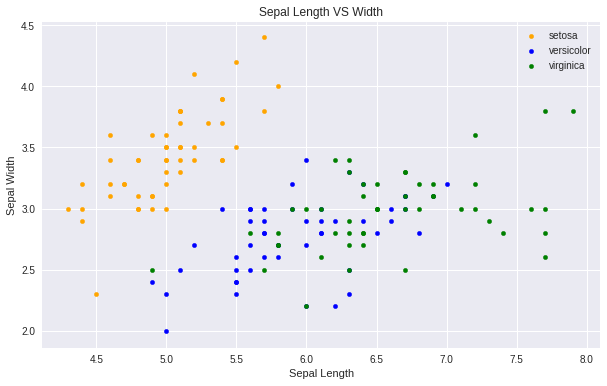

In [6]:
fig = iris[iris.species=='setosa'].plot(kind='scatter',x='sepal length',y='sepal width',color='orange', label='setosa')
iris[iris.species=='versicolor'].plot(kind='scatter',x='sepal length',y='sepal width',color='blue', label='versicolor',ax=fig)
iris[iris.species=='virginica'].plot(kind='scatter',x='sepal length',y='sepal width',color='green', label='virginica', ax=fig)
fig.set_xlabel("Sepal Length")
fig.set_ylabel("Sepal Width")
fig.set_title("Sepal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

The above graph shows relationship between the sepal length and width. Now we will check relationship between the petal length and width.

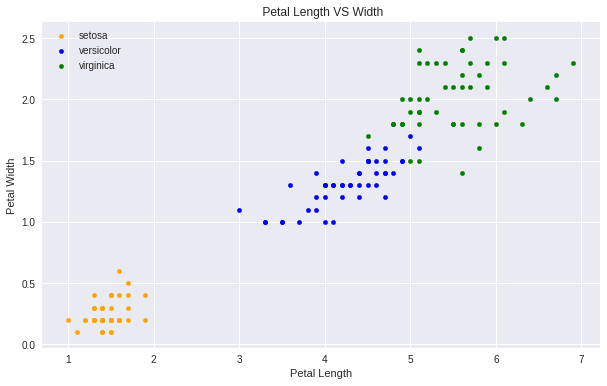

In [7]:
fig = iris[iris.species=='setosa'].plot.scatter(x='petal length',y='petal width',color='orange', label='setosa')
iris[iris.species=='versicolor'].plot.scatter(x='petal length',y='petal width',color='blue', label='versicolor',ax=fig)
iris[iris.species=='virginica'].plot.scatter(x='petal length',y='petal width',color='green', label='virginica', ax=fig)
fig.set_xlabel("Petal Length")
fig.set_ylabel("Petal Width")
fig.set_title(" Petal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.show()

As we can see that the Petal Features are giving a better cluster division compared to the Sepal features. This is an indication that the Petals can help in better and accurate Predictions over the Sepal. We will check that later.

**PCA Analysis**  
Here  is a PCA data representation of the full set data, the dim of data is reduced to 2 from 4.

In [8]:
pca = PCA(n_components=2)
pca.fit(iris.values[:,:-1])
projected = pca.transform(iris.values[:,:-1])
print('shape of projected data',projected.shape )
print('\npca components\n',pca.components_)
print('\npca explained variance\n',pca.explained_variance_)
print()
X_new = pca.inverse_transform(projected)
print('shape of inverse projected data\n',X_new.shape )

shape of projected data (150, 2)

pca components
 [[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
 [ 0.65658877  0.73016143 -0.17337266 -0.07548102]]

pca explained variance
 [4.22824171 0.24267075]

shape of inverse projected data
 (150, 4)


/usr/local/lib/python3.6/dist-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: The spectral and spectral_r colormap was deprecated in version 2.0. Use nipy_spectral and nipy_spectral_r instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


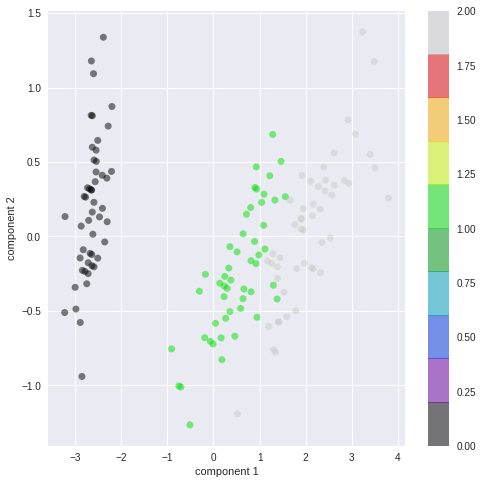

In [9]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
plt.scatter(projected[:, 0], projected[:, 1],
            c=data['target'], edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('spectral', 10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar();


# Now let us see how are the length and width are distributed

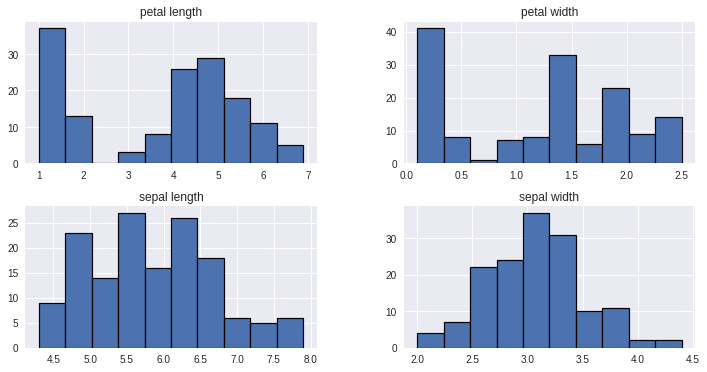

In [10]:
iris.hist(edgecolor='black', linewidth=1.2)
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()

Now let us see how the length and width vary according to the species

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:588: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  kde_data = remove_na(group_data)
/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:816: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  violin_data = remove_na(group_data)


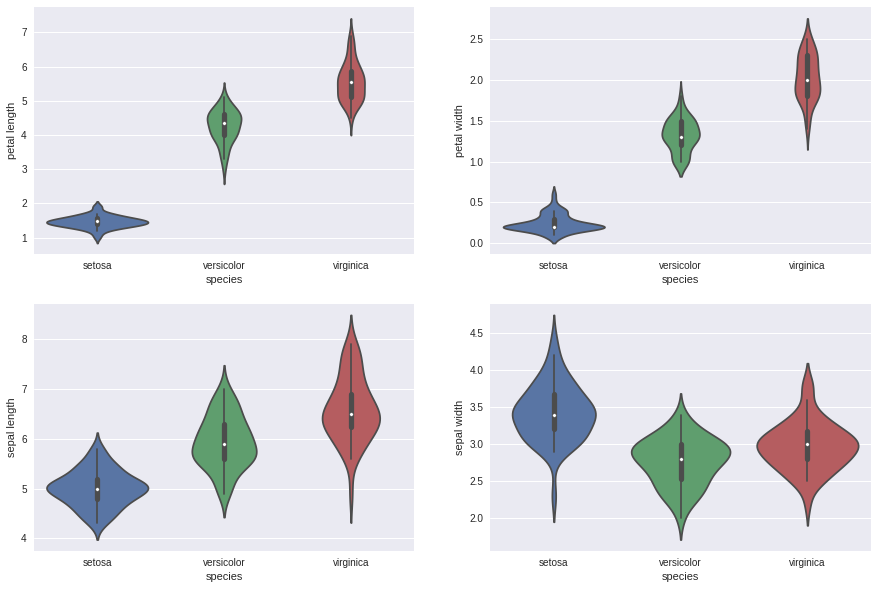

In [11]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='species',y='petal length',data=iris)
plt.subplot(2,2,2)
sns.violinplot(x='species',y='petal width',data=iris)
plt.subplot(2,2,3)
sns.violinplot(x='species',y='sepal length',data=iris)
plt.subplot(2,2,4)
sns.violinplot(x='species',y='sepal width',data=iris)


The violinplot shows density of the length and width in the species. The thinner part denotes that there is less density whereas the fatter part conveys higher density


# importing alll the necessary packages to use the various classification algorithms

In [12]:
# install graphviz for colab
!apt-get install graphviz
!pip install scikit-learn

Reading package lists... Done
Building dependency tree       
Reading state information... Done
graphviz is already the newest version (2.40.1-2).
0 upgraded, 0 newly installed, 0 to remove and 8 not upgraded.


In [0]:
from sklearn.linear_model import LogisticRegression  # for Logistic Regression algorithm
#from sklearn.cross_validation import train_test_split #to split the dataset for training and testing
from sklearn.model_selection import train_test_split #to split the dataset for training and testing
from sklearn.neighbors import KNeighborsClassifier  # for K nearest neighbours
from sklearn import svm  #for Support Vector Machine (SVM) Algorithm
from sklearn import metrics #for checking the model accuracy
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier #for using Decision Tree Algoithm
from sklearn import tree

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.metrics import confusion_matrix
import seaborn as sns

In [14]:
iris.shape

(150, 5)

**Correlation Analysis**  

Now, when we train any algorithm, the number of features and their correlation plays an important role. If there are features and many of the features are highly correlated, then training an algorithm with all the featues will reduce the accuracy. Thus features selection should be done carefully. This dataset has less featues but still we will see the correlation.

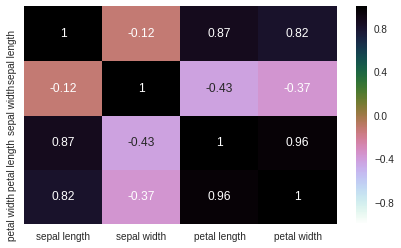

In [15]:
plt.figure(figsize=(7,4)) 
sns.heatmap(iris.corr(),annot=True,cmap='cubehelix_r') #draws  heatmap with input as the correlation matrix calculted by(iris.corr())
plt.show()

**The Sepal Width and Length are not correlated The Petal Width and Length are highly correlated**

We will use all the features for training the algorithm and check the accuracy.

Then we will use 1 Petal Feature and 1 Sepal Feature to check the accuracy of the algorithm as we are using only 2 features that are not correlated. Thus we can have a variance in the dataset which may help in better accuracy. We will check it later.

**Steps To Be followed When Applying an Algorithm**
* Split the dataset into training and testing dataset. The testing dataset is generally smaller than training one as it will help in training the model better.
* Select any algorithm based on the problem (classification or regression) whatever you feel may be good.
* Then pass the training dataset to the algorithm to train it. We use the .fit() method
* Then pass the testing data to the trained algorithm to predict the outcome. We use the .predict() method.
* We then check the accuracy by passing the predicted outcome and the actual output to the model.

## Splitting The Data into Training And Testing Dataset

In [16]:
train, test = train_test_split(iris, test_size = 0.3)# in this our main data is split into train and test
# the attribute test_size=0.3 splits the data into 70% and 30% ratio. train=70% and test=30%
print(train.shape)
print(test.shape)

(105, 5)
(45, 5)


In [17]:
train_X = train[['sepal length','sepal width','petal length','petal width']]# taking the training data features
train_y=train.species# output of our training data
test_X= test[['sepal length','sepal width','petal length','petal width']] # taking test data features
test_y =test.species   #output value of test data

# Take a look into data
print(train_X.head(2))
print()
print(test_X.head(2))
print()
print(train_y.head())

    sepal length  sepal width  petal length  petal width
97           6.2          2.9           4.3          1.3
41           4.5          2.3           1.3          0.3

    sepal length  sepal width  petal length  petal width
30           4.8          3.1           1.6          0.2
5            5.4          3.9           1.7          0.4

97     versicolor
41         setosa
134     virginica
59     versicolor
90     versicolor
Name: species, dtype: object


**Support Vector Machine (SVM)**

In [18]:
model = svm.SVC() #select the algorithm
model.fit(train_X,train_y) # we train the algorithm with the training data and the training output
prediction=model.predict(test_X) #now we pass the testing data to the trained algorithm
print('The accuracy of the SVM is:',metrics.accuracy_score(prediction,test_y))#now we check the accuracy of the algorithm. 
#we pass the predicted output by the model and the actual output

The accuracy of the SVM is: 1.0


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Here we plot the confusion matrix

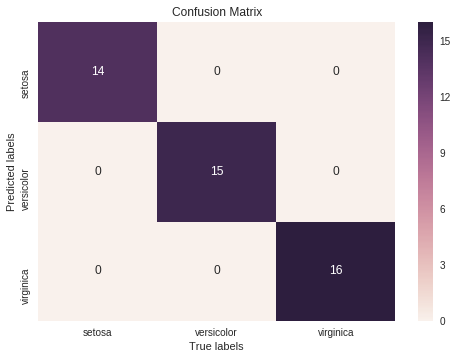

In [19]:
cm = confusion_matrix(prediction, test_y.values)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax)
ax.set_ylabel('Predicted labels');ax.set_xlabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(labels); ax.yaxis.set_ticklabels(labels[::-1]);



In [20]:
# still working on this row
"""
y = train_y.values
y[y=='setosa']=0
y[y=='versicolor']=1
y[y=='virginica']=2
    
plot_decision_regions(X = train_X.values.astype(float)
                      , y = y.astype(np.int)
                      , classifier = model
                      , test_idx = range(105,150))
                      """

"\ny = train_y.values\ny[y=='setosa']=0\ny[y=='versicolor']=1\ny[y=='virginica']=2\n    \nplot_decision_regions(X = train_X.values.astype(float)\n                      , y = y.astype(np.int)\n                      , classifier = model\n                      , test_idx = range(105,150))\n                      "

SVM is giving very good accuracy . We will continue to check the accuracy for different models.

Now we will follow the same steps as above for training various machine learning algorithms.

**Logistic Regression**

In [44]:
model = LogisticRegression()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('The accuracy of the Logistic Regression is',metrics.accuracy_score(prediction,test_y))

The accuracy of the Logistic Regression is 0.9777777777777777


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [45]:
model.coef_

array([[ 0.39478166,  1.33152188, -2.10933241, -0.93557203],
       [ 0.21735082, -1.17902411,  0.49094125, -0.93294915],
       [-1.42226045, -1.4891648 ,  2.1356109 ,  2.15912998]])

**Decision Tree**

In [22]:
model=DecisionTreeClassifier()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('The accuracy of the Decision Tree is',metrics.accuracy_score(prediction,test_y))

The accuracy of the Decision Tree is 0.9555555555555556


**Display decision tree**  

Once trained, we can export the tree in Graphviz format using the export_graphviz exporter. If you use the conda package manager, the graphviz binaries and the python package can be installed with

conda install python-graphviz
Alternatively binaries for graphviz can be downloaded from the graphviz project homepage, and the Python wrapper installed from pypi with pip install graphviz.

Below is an example graphviz export of the above tree trained on the entire iris dataset; the results are saved in an output 

In [23]:
import graphviz 
dot_data = tree.export_graphviz(model, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("iris") 

'iris.pdf'

The export_graphviz exporter also supports a variety of aesthetic options, including coloring nodes by their class (or value for regression) and using explicit variable and class names if desired. Jupyter notebooks also render these plots inline automatically:

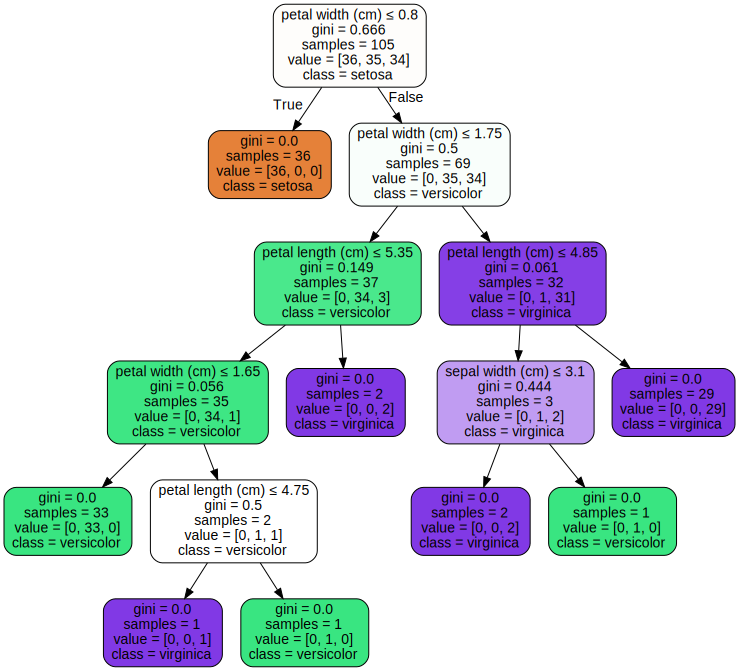

In [24]:
dot_data = tree.export_graphviz(model, out_file=None, 
                      feature_names=data.feature_names,  
                      class_names=data.target_names,  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In the above graph, we can observe that decision tree use gini index to determine the node attributes which is a statistic measures, which relates to entropy calculation.

**K-Nearest Neighbours**

In [25]:
model=KNeighborsClassifier(n_neighbors=3) #this examines 3 neighbours for putting the new data into a class
model.fit(train_X,train_y)
prediction=model.predict(test_X)
print('The accuracy of the KNN is',metrics.accuracy_score(prediction,test_y))

The accuracy of the KNN is 0.9555555555555556


Let's check the accuracy for various values of n for K-Nearest nerighbours

([<matplotlib.axis.XTick at 0x7f990cdd3630>,
 <a list of 10 Text xticklabel objects>)

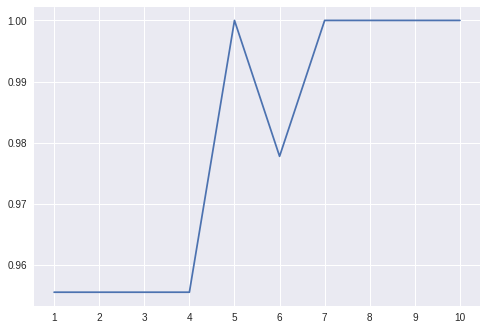

In [26]:
a_index=list(range(1,11))
a=pd.Series()
x=[1,2,3,4,5,6,7,8,9,10]
for i in list(range(1,11)):
    model=KNeighborsClassifier(n_neighbors=i) 
    model.fit(train_X,train_y)
    prediction=model.predict(test_X)
    a=a.append(pd.Series(metrics.accuracy_score(prediction,test_y)))
plt.plot(a_index, a)
plt.xticks(x)

In [27]:
# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(train_y.values).astype(int)
print(integer_encoded[:5])
# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded[:5])

# integer encode
xinteger_encoded = label_encoder.fit_transform(test_y.values).astype(int)
print(xinteger_encoded[:5])
# binary encode
xinteger_encoded = xinteger_encoded.reshape(len(xinteger_encoded), 1)
xonehot_encoded = onehot_encoder.fit_transform(xinteger_encoded)
print(xonehot_encoded[:5])


[1 0 2 1 1]
[[0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 1. 0.]
 [0. 1. 0.]]
[0 0 2 0 2]
[[1. 0. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a Lab

In [28]:
model = MLPClassifier(solver='sgd', alpha=1e-5, learning_rate_init=0.0001, batch_size=2,
                      max_iter=200, validation_fraction = 0.1, tol=0.00001,
                      hidden_layer_sizes=(30,20), random_state=1,verbose=True
                      )

model.fit(train_X,onehot_encoded)

Iteration 1, loss = 2.50746098
Iteration 2, loss = 2.10812671
Iteration 3, loss = 1.96577485
Iteration 4, loss = 1.90965255
Iteration 5, loss = 1.88440588
Iteration 6, loss = 1.86557786
Iteration 7, loss = 1.84984569
Iteration 8, loss = 1.83485639
Iteration 9, loss = 1.82168400
Iteration 10, loss = 1.80885762
Iteration 11, loss = 1.79507424
Iteration 12, loss = 1.77968626
Iteration 13, loss = 1.76491859
Iteration 14, loss = 1.74943017
Iteration 15, loss = 1.73734497
Iteration 16, loss = 1.71963672
Iteration 17, loss = 1.70273935
Iteration 18, loss = 1.68828417
Iteration 19, loss = 1.67163814
Iteration 20, loss = 1.65365283
Iteration 21, loss = 1.63964139
Iteration 22, loss = 1.61928757
Iteration 23, loss = 1.59561358
Iteration 24, loss = 1.57659853
Iteration 25, loss = 1.55527813
Iteration 26, loss = 1.53648703
Iteration 27, loss = 1.51762334
Iteration 28, loss = 1.50245632
Iteration 29, loss = 1.47994214
Iteration 30, loss = 1.46448149
Iteration 31, loss = 1.43927454
Iteration 32, los

/usr/local/lib/python3.6/dist-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPClassifier(activation='relu', alpha=1e-05, batch_size=2, beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(30, 20), learning_rate='constant',
       learning_rate_init=0.0001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=1, shuffle=True, solver='sgd', tol=1e-05,
       validation_fraction=0.1, verbose=True, warm_start=False)

In [29]:
print(model.score(train_X, onehot_encoded))
print(model.score(test_X, xonehot_encoded))

0.9619047619047619
0.9555555555555556


# Feature Selection

We used all the features of iris in above models. Now we will use Petals and Sepals Seperately
Creating Petals And Sepals Training Data

In [0]:
petal=iris[['petal length','petal width','species']]
sepal=iris[['sepal length','sepal width','species']]

In [0]:
train_p,test_p=train_test_split(petal,test_size=0.3,random_state=0)  #petals
train_x_p=train_p[['petal width','petal length']]
train_y_p=train_p.species
test_x_p=test_p[['petal width','petal length']]
test_y_p=test_p.species


train_s,test_s=train_test_split(sepal,test_size=0.3,random_state=0)  #Sepal
train_x_s=train_s[['sepal length','sepal width']]
train_y_s=train_s.species
test_x_s=test_s[['sepal length','sepal width']]
test_y_s=test_s.species

**SVM**

In [32]:
model=svm.SVC()
model.fit(train_x_p,train_y_p) 
prediction=model.predict(test_x_p) 
print('The accuracy of the SVM using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model=svm.SVC()
model.fit(train_x_s,train_y_s) 
prediction=model.predict(test_x_s) 
print('The accuracy of the SVM using Sepal is:',metrics.accuracy_score(prediction,test_y_s))

The accuracy of the SVM using Petals is: 0.9777777777777777
The accuracy of the SVM using Sepal is: 0.8


/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


**Logistic Regression**

In [39]:
model = LogisticRegression()
model.fit(train_x_p,train_y_p) 
prediction=model.predict(test_x_p) 
print('The accuracy of the Logistic Regression using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model.fit(train_x_s,train_y_s) 
prediction=model.predict(test_x_s) 
print('The accuracy of the Logistic Regression using Sepals is:',metrics.accuracy_score(prediction,test_y_s))

The accuracy of the Logistic Regression using Petals is: 0.6888888888888889
The accuracy of the Logistic Regression using Sepals is: 0.6444444444444445


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [42]:
model.coef_

array([[-2.18972398,  3.49838946],
       [ 0.38209827, -1.35762058],
       [ 1.10754955, -1.72534203]])

**Decision Tree**

In [34]:
model=DecisionTreeClassifier()
model.fit(train_x_p,train_y_p) 
prediction=model.predict(test_x_p) 
print('The accuracy of the Decision Tree using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model.fit(train_x_s,train_y_s) 
prediction=model.predict(test_x_s) 
print('The accuracy of the Decision Tree using Sepals is:',metrics.accuracy_score(prediction,test_y_s))

The accuracy of the Decision Tree using Petals is: 0.9555555555555556
The accuracy of the Decision Tree using Sepals is: 0.6444444444444445


**K-Nearest Neighbours**

In [35]:
model=KNeighborsClassifier(n_neighbors=3) 
model.fit(train_x_p,train_y_p) 
prediction=model.predict(test_x_p) 
print('The accuracy of the KNN using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model.fit(train_x_s,train_y_s) 
prediction=model.predict(test_x_s) 
print('The accuracy of the KNN using Sepals is:',metrics.accuracy_score(prediction,test_y_s))

The accuracy of the KNN using Petals is: 0.9777777777777777
The accuracy of the KNN using Sepals is: 0.7333333333333333


**MLPClassifier**

In [36]:
# integer encode
label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(train_y_p.values).astype(int)
print(integer_encoded[:5])
# binary encode
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded[:5])

# integer encode
xinteger_encoded = label_encoder.fit_transform(test_y_p.values).astype(int)
print(xinteger_encoded[:5])
# binary encode
xinteger_encoded = xinteger_encoded.reshape(len(xinteger_encoded), 1)
xonehot_encoded = onehot_encoder.fit_transform(xinteger_encoded)
print(xonehot_encoded[:5])

# integer encode
sinteger_encoded = label_encoder.fit_transform(train_y_s.values).astype(int)
print(sinteger_encoded[:5])
# binary encode
sinteger_encoded = sinteger_encoded.reshape(len(sinteger_encoded), 1)
sonehot_encoded = onehot_encoder.fit_transform(sinteger_encoded)
print(onehot_encoded[:5])

# integer encode
sxinteger_encoded = label_encoder.fit_transform(test_y_s.values).astype(int)
print(sxinteger_encoded[:5])
# binary encode
sxinteger_encoded = sxinteger_encoded.reshape(len(sxinteger_encoded), 1)
sxonehot_encoded = onehot_encoder.fit_transform(sxinteger_encoded)
print(sxonehot_encoded[:5])


[1 2 2 2 2]
[[0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]
[2 1 0 2 0]
[[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]
[1 2 2 2 2]
[[0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]
[2 1 0 2 0]
[[0. 0. 1.]
 [0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 1.]
 [1. 0. 0.]]


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a Lab

In [37]:
model = MLPClassifier(solver='lbfgs', alpha=1e-5, learning_rate_init=0.0005, batch_size='auto',
                      max_iter=200, validation_fraction = 0.1, tol=0.00000001,
                      hidden_layer_sizes=(30,10), random_state=1,verbose=True
                      )

model.fit(train_x_p,onehot_encoded)
print(model.score(train_x_p, onehot_encoded))
print(model.score(test_x_p, xonehot_encoded))

model.fit(train_x_s,sonehot_encoded)
print(model.score(train_x_s, sonehot_encoded))
print(model.score(test_x_s, sxonehot_encoded))


0.9523809523809523
0.9777777777777777
0.7904761904761904
0.7111111111111111


In [38]:
model = MLPClassifier(solver='sgd', alpha=1e-5, learning_rate_init=0.003, batch_size=10,
                      max_iter=200, validation_fraction = 0.1, tol=0.00000001,
                      hidden_layer_sizes=(30,10), random_state=1,verbose=False
                      )

model.fit(train_x_p,onehot_encoded)
print(model.score(train_x_p, onehot_encoded))
print(model.score(test_x_p, xonehot_encoded))

model.fit(train_x_s,sonehot_encoded)
print(model.score(train_x_s, sonehot_encoded))
print(model.score(test_x_s, sxonehot_encoded))


0.9428571428571428
0.9777777777777777
0.7238095238095238
0.6444444444444445


**Observations:**

Using Petals over Sepal for training the data gives a much better accuracy.
This was expected as we saw in the heatmap above that the correlation between the Sepal Width and Length was very low whereas the correlation between Petal Width and Length was very high.
Thus we have just implemented some of the common Machine Learning. Since the dataset is small with very few features, I didn't cover some concepts as they would be relevant when we have many features.



model=KNeighborsClassifier(n_neighbors=3) 
model.fit(train_x_p,train_y_p) 
prediction=model.predict(test_x_p) 
print('The accuracy of the KNN using Petals is:',metrics.accuracy_score(prediction,test_y_p))

model.fit(train_x_s,train_y_s) 
prediction=model.predict(test_x_s) 
print('The accuracy of the KNN using Sepals is:',metrics.accuracy_score(prediction,test_y_s))